# Keyboard Typo Corrector

**Reference**
- Dijkstras algorithm for Shortest path: https://likegeeks.com/python-dijkstras-algorithm/
- Keyboard layout: https://www.typingpal.com/en/news/what-is-the-difference-between-QWERTY-QWERTZ-and-AZERTY-keyboards

**Finding shortest path**
- Dijkstra’s algorithm
- Bellman-Ford algorithm
- Floyd-Warshall algorithm
- Johnson’s algorithm

---

## Import modules

In [1]:
# Module for collection manipulation
from collections import defaultdict

## Convert data into graph representation

In [2]:
# Dictionary for QWERTY keyboard
dict_qwerty = {
    'Q': [['Q', 'W'], ['Q', 'S'], ['Q', 'A']],
    'A': [['A', 'W'], ['A', 'Q'], ['Q', 'S'], ['A', 'Z'], ['A', 'X']],
    'Z': [['Z', 'A'], ['Z', 'S'], ['Z', 'X']],
    'W': [['W', 'Q'], ['W', 'A'], ['W', 'S'], ['W', 'D'], ['W', 'E']],
    'S': [['S', 'Q'], ['S', 'W'], ['S', 'E'], ['S', 'A'], ['S', 'D'], ['S', 'Z'], ['S', 'X'], ['S', 'C']],
    'X': [['X', 'Z'], ['X', 'A'], ['X', 'S'], ['X', 'D'], ['X', 'C']],
    'E': [['E', 'W'], ['E', 'S'], ['E', 'D'], ['E', 'F'], ['E', 'R']],
    'D': [['D', 'W'], ['D', 'E'], ['D', 'R'], ['D', 'S'], ['D', 'F'], ['D', 'X'], ['D', 'C'], ['D', 'V']],
    'R': [['R', 'E'], ['R', 'D'], ['R', 'F'], ['R', 'G'], ['R', 'T']],
    'F': [['F', 'E'], ['F', 'R'], ['F', 'T'], ['F', 'D'], ['F', 'G'], ['F', 'C'], ['F', 'V'], ['F', 'B']],
    'V': [['V', 'D'], ['V', 'F'], ['V', 'G'], ['V', 'C'], ['V', 'B']],
    'T': [['T', 'R'], ['T', 'Y'], ['T', 'F'], ['T', 'G'], ['T', 'H']],
    'G': [['G', 'R'], ['G', 'T'], ['G', 'Y'], ['G', 'F'], ['G', 'H'], ['G', 'V'], ['G', 'B'], ['G', 'N']],
    'B': [['B', 'F'], ['B', 'G'], ['B', 'H'], ['B', 'V'], ['B', 'N']],
    'Y': [['Y', 'T'], ['Y', 'U'], ['Y', 'G'], ['Y', 'H'], ['Y', 'J']],
    'H': [['H', 'T'], ['H', 'Y'], ['H', 'U'], ['H', 'G'], ['H', 'J'], ['H', 'B'], ['H', 'N'], ['H', 'M']],
    'N': [['N', 'G'], ['N', 'H'], ['N', 'J'], ['N', 'B'], ['N', 'M']],
    'U': [['U', 'Y'], ['U', 'I'], ['U', 'H'], ['U', 'J'], ['U', 'K']],
    'J': [['J', 'Y'], ['J', 'U'], ['J', 'I'], ['J', 'H'], ['J', 'K'], ['J', 'N'], ['J', 'M']],
    'M': [['M', 'H'], ['M', 'J'], ['M', 'K'], ['M', 'N']],
    'I': [['I', 'U'], ['I', 'O'], ['I', 'J'], ['I', 'K'], ['I', 'L']],
    'K': [['K', 'U'], ['K', 'I'], ['K', 'O'], ['K', 'J'], ['K', 'L'], ['K', 'M']],
    'O': [['O', 'I'], ['O', 'P'], ['O', 'K'], ['O', 'L']],
    'L': [['L', 'I'], ['L', 'O'], ['L', 'P'], ['L', 'K']],
    'P': [['P', 'O'], ['P', 'L']]
}

In [3]:
# Get all values from dictionary without distance
edges_without_distance = []
for key in dict_qwerty.keys():
    for elem in dict_qwerty[key]:
        edges_without_distance.append(elem)

In [4]:
len(edges_without_distance)

133

In [5]:
edges_without_distance

[['Q', 'W'],
 ['Q', 'S'],
 ['Q', 'A'],
 ['A', 'W'],
 ['A', 'Q'],
 ['Q', 'S'],
 ['A', 'Z'],
 ['A', 'X'],
 ['Z', 'A'],
 ['Z', 'S'],
 ['Z', 'X'],
 ['W', 'Q'],
 ['W', 'A'],
 ['W', 'S'],
 ['W', 'D'],
 ['W', 'E'],
 ['S', 'Q'],
 ['S', 'W'],
 ['S', 'E'],
 ['S', 'A'],
 ['S', 'D'],
 ['S', 'Z'],
 ['S', 'X'],
 ['S', 'C'],
 ['X', 'Z'],
 ['X', 'A'],
 ['X', 'S'],
 ['X', 'D'],
 ['X', 'C'],
 ['E', 'W'],
 ['E', 'S'],
 ['E', 'D'],
 ['E', 'F'],
 ['E', 'R'],
 ['D', 'W'],
 ['D', 'E'],
 ['D', 'R'],
 ['D', 'S'],
 ['D', 'F'],
 ['D', 'X'],
 ['D', 'C'],
 ['D', 'V'],
 ['R', 'E'],
 ['R', 'D'],
 ['R', 'F'],
 ['R', 'G'],
 ['R', 'T'],
 ['F', 'E'],
 ['F', 'R'],
 ['F', 'T'],
 ['F', 'D'],
 ['F', 'G'],
 ['F', 'C'],
 ['F', 'V'],
 ['F', 'B'],
 ['V', 'D'],
 ['V', 'F'],
 ['V', 'G'],
 ['V', 'C'],
 ['V', 'B'],
 ['T', 'R'],
 ['T', 'Y'],
 ['T', 'F'],
 ['T', 'G'],
 ['T', 'H'],
 ['G', 'R'],
 ['G', 'T'],
 ['G', 'Y'],
 ['G', 'F'],
 ['G', 'H'],
 ['G', 'V'],
 ['G', 'B'],
 ['G', 'N'],
 ['B', 'F'],
 ['B', 'G'],
 ['B', 'H'],
 ['B', 'V'],

In [6]:
# Get all values from dictionary with distance
edges_with_distance = []
for key in dict_qwerty.keys():
    for elem in dict_qwerty[key]:
        new_elem = elem + [1]
        edges_with_distance.append(new_elem)

In [7]:
edges_with_distance

[['Q', 'W', 1],
 ['Q', 'S', 1],
 ['Q', 'A', 1],
 ['A', 'W', 1],
 ['A', 'Q', 1],
 ['Q', 'S', 1],
 ['A', 'Z', 1],
 ['A', 'X', 1],
 ['Z', 'A', 1],
 ['Z', 'S', 1],
 ['Z', 'X', 1],
 ['W', 'Q', 1],
 ['W', 'A', 1],
 ['W', 'S', 1],
 ['W', 'D', 1],
 ['W', 'E', 1],
 ['S', 'Q', 1],
 ['S', 'W', 1],
 ['S', 'E', 1],
 ['S', 'A', 1],
 ['S', 'D', 1],
 ['S', 'Z', 1],
 ['S', 'X', 1],
 ['S', 'C', 1],
 ['X', 'Z', 1],
 ['X', 'A', 1],
 ['X', 'S', 1],
 ['X', 'D', 1],
 ['X', 'C', 1],
 ['E', 'W', 1],
 ['E', 'S', 1],
 ['E', 'D', 1],
 ['E', 'F', 1],
 ['E', 'R', 1],
 ['D', 'W', 1],
 ['D', 'E', 1],
 ['D', 'R', 1],
 ['D', 'S', 1],
 ['D', 'F', 1],
 ['D', 'X', 1],
 ['D', 'C', 1],
 ['D', 'V', 1],
 ['R', 'E', 1],
 ['R', 'D', 1],
 ['R', 'F', 1],
 ['R', 'G', 1],
 ['R', 'T', 1],
 ['F', 'E', 1],
 ['F', 'R', 1],
 ['F', 'T', 1],
 ['F', 'D', 1],
 ['F', 'G', 1],
 ['F', 'C', 1],
 ['F', 'V', 1],
 ['F', 'B', 1],
 ['V', 'D', 1],
 ['V', 'F', 1],
 ['V', 'G', 1],
 ['V', 'C', 1],
 ['V', 'B', 1],
 ['T', 'R', 1],
 ['T', 'Y', 1],
 ['T', '

## Function for shortest pathfinding

**Input**
- Edges
- Starting point
- Destination point

**Output**
- Shortest path
- Distance

**Source**
- https://gist.github.com/dingran/b827b65a252000e25d818ba3520242e1

**Functions**

In [8]:
# Build the graph
def build_graph(edge_list):
    graph = defaultdict(list)
    seen_edges = defaultdict(int)
    for src, dst, weight in edge_list:
        seen_edges[(src, dst, weight)] += 1
        if seen_edges[(src, dst, weight)] > 1:
            continue
        graph[src].append((dst, weight))
        graph[dst].append((src, weight))
    return graph

# Dijkstra algorithm
def dijkstra(graph, src, dst = None):
    nodes = []
    for n in graph:
        nodes.append(n)
        nodes += [x[0] for x in graph[n]]

    q = set(nodes)
    nodes = list(q)
    dist = dict()
    prev = dict()
    for n in nodes:
        dist[n] = float('inf')
        prev[n] = None

    dist[src] = 0

    while q:
        u = min(q, key=dist.get)
        q.remove(u)

        if dst is not None and u == dst:
            return dist[dst], prev

        for v, w in graph.get(u, ()):
            alt = dist[u] + w
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u

    return dist, prev

# Find shortest path
def find_path(pr, node):
    p = []
    while node is not None:
        p.append(node)
        node = pr[node]
    return p[::-1]

**Theoretical implementation**

In [9]:
# List of edges
edges = [
    ('A', 'B', 7),
    ('A', 'D', 5),
    ('B', 'C', 8),
    ('B', 'D', 9),
    ('B', 'E', 7),
    ('C', 'E', 5),
    ('D', 'E', 15),
    ('D', 'F', 6),
    ('E', 'F', 8),
    ('E', 'G', 9),
    ('F', 'G', 11)
]

# Create a graph
g = build_graph(edges)

In [10]:
# Single source, single destination
print('--- Single source, single destination ---')
d, prev = dijkstra(g, 'A', 'E')
path = find_path(prev, 'E')
print('A -> E: distance = {}, path = {}'.format(d, path))

d, prev = dijkstra(g, 'F', 'G')
path = find_path(prev, 'G')
print('F -> G: distance = {}, path = {}'.format(d, path))

--- Single source, single destination ---
A -> E: distance = 14, path = ['A', 'B', 'E']
F -> G: distance = 11, path = ['F', 'G']


In [11]:
# Single source, all destinations
print('--- Single source, all destinations ---')
ds, prev = dijkstra(g, 'A')
for k in ds:
    path = find_path(prev, k)
    print('A -> {}: distance = {}, path = {}'.format(k, ds[k], path))

--- Single source, all destinations ---
A -> E: distance = 14, path = ['A', 'B', 'E']
A -> F: distance = 11, path = ['A', 'D', 'F']
A -> A: distance = 0, path = ['A']
A -> B: distance = 7, path = ['A', 'B']
A -> D: distance = 5, path = ['A', 'D']
A -> G: distance = 22, path = ['A', 'D', 'F', 'G']
A -> C: distance = 15, path = ['A', 'B', 'C']


**Real implementation on keyboard**

In [12]:
graph = build_graph(edges_with_distance)
graph

defaultdict(list,
            {'Q': [('W', 1), ('S', 1), ('A', 1), ('A', 1), ('W', 1), ('S', 1)],
             'W': [('Q', 1),
              ('A', 1),
              ('Q', 1),
              ('A', 1),
              ('S', 1),
              ('D', 1),
              ('E', 1),
              ('S', 1),
              ('E', 1),
              ('D', 1)],
             'S': [('Q', 1),
              ('Z', 1),
              ('W', 1),
              ('Q', 1),
              ('W', 1),
              ('E', 1),
              ('A', 1),
              ('D', 1),
              ('Z', 1),
              ('X', 1),
              ('C', 1),
              ('X', 1),
              ('E', 1),
              ('D', 1)],
             'A': [('Q', 1),
              ('W', 1),
              ('Q', 1),
              ('Z', 1),
              ('X', 1),
              ('Z', 1),
              ('W', 1),
              ('S', 1),
              ('X', 1)],
             'Z': [('A', 1), ('A', 1), ('S', 1), ('X', 1), ('S', 1), ('X', 1)],
            

In [13]:
d, prev = dijkstra(graph, 'A', 'E')
path = find_path(prev, 'E')
print('A -> E: distance = {}, path = {}'.format(d, path))

A -> E: distance = 2, path = ['A', 'S', 'E']


## Function for string comparison

**Input**
- First string
- Second string

**Output**
- List of position

In [14]:
s1 = 'WATCH'
s2 = 'WITCH'
[i for i in range(len(s1)) if s1[i] != s2[i]]

[1]

## Core functions

**Input**
- Typo string
- List of candidate strings

**Output**
- Dictionary that contains string and distance

In [15]:
def keyboard_corrector(graph, typo, strings):
    # Dictionary of distance
    dic_dist = {i:0 for i in strings}
    # Calculate the distance
    for string in strings:
        try:
            index = [i for i in range(len(typo)) if typo[i] != string[i]]
            distance = 0
            for i in index:
                d, prev = dijkstra(graph = graph, src = typo[i], dst = string[i])
                distance += d
            dic_dist.update({string: distance})
        except:
            pass
    return dic_dist

In [16]:
keyboard_corrector(graph = graph, typo = 'WETCH', strings = ['WATCH', 'WITCH'])

{'WATCH': 2, 'WITCH': 5}

---

## Graph representation

In [17]:
# Module for network analysis
import networkx as nx
# Module for data viz
import matplotlib.pyplot as plt

In [18]:
# Dictionary for QWERTY keyboard
dict_sample = {
    'A': [['A', 'B', 2], ['A', 'C', 3], ['A', 'D', 1]],
    'B': [['B', 'C', 2], ['B', 'E', 3]],
    'C': [['C', 'E', 1]],
    'D': [['D', 'E', 5]]
}

In [19]:
# Get all values from dictionary without distance
edges_sample = []
for key in dict_sample.keys():
    for elem in dict_sample[key]:
        edges_sample.append(elem)

In [20]:
# Represent it to graph
graph_with_distance = defaultdict(dict)
for row in edges_sample:
    graph_with_distance[row[0]][row[1]] = row[2]
    graph_with_distance[row[1]][row[0]] = row[2]

In [21]:
graph_with_distance

defaultdict(dict,
            {'A': {'B': 2, 'C': 3, 'D': 1},
             'B': {'A': 2, 'C': 2, 'E': 3},
             'C': {'A': 3, 'B': 2, 'E': 1},
             'D': {'A': 1, 'E': 5},
             'E': {'B': 3, 'C': 1, 'D': 5}})

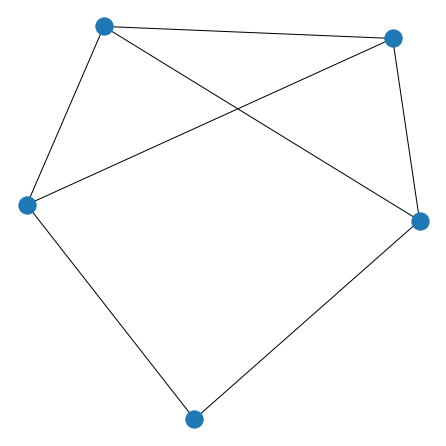

In [22]:
plt.figure(figsize = (6, 6))
# 1. Create the graph
g = nx.from_dict_of_lists(graph_with_distance)
# 2. Create a layout for our nodes 
layout = nx.spring_layout(g, iterations = 50)
nx.draw(g)